# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


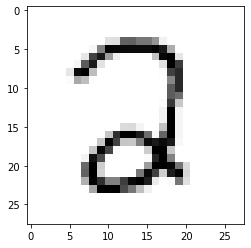

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.23389326406334848
train accuracy is: 0.6955433149724587, test accuracy is 0.6869959677419355


Epoch 10 Loss 0.1027984161459574
train accuracy is: 0.9101986312802537, test accuracy is 0.9243951612903226


Epoch 20 Loss 0.061845151659013234
train accuracy is: 0.9344016024036054, test accuracy is 0.9490927419354839


Epoch 30 Loss 0.04772087015034495
train accuracy is: 0.9463361709230512, test accuracy is 0.9581653225806451


Epoch 40 Loss 0.040695245381272574
train accuracy is: 0.9526790185277917, test accuracy is 0.9662298387096774


Epoch 50 Loss 0.03644493045709573
train accuracy is: 0.9567684860624269, test accuracy is 0.9672379032258065


Epoch 60 Loss 0.03354382713794414
train accuracy is: 0.9602737439492572, test accuracy is 0.9672379032258065


Epoch 70 Loss 0.03139849552160542
train accuracy is: 0.9632782507093974, test accuracy is 0.9707661290322581


Epoch 80 Loss 0.029752619176080602
train accuracy is: 0.9649474211316975, test accuracy is 0.9722782258064516


Epoch 90 Loss 0.028415658376744507
train accuracy is: 0.9675346352862627, test accuracy is 0.9712701612903226


Epoch 100 Loss 0.02729983695701112
train accuracy is: 0.9687865131029878, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.026344950108211206
train accuracy is: 0.9697880153563679, test accuracy is 0.9707661290322581


Epoch 120 Loss 0.02550772418673567
train accuracy is: 0.9701218494408279, test accuracy is 0.9707661290322581


Epoch 130 Loss 0.024764733662123322
train accuracy is: 0.970956434651978, test accuracy is 0.9712701612903226


Epoch 140 Loss 0.02409889829007811
train accuracy is: 0.971707561342013, test accuracy is 0.9707661290322581


Epoch 150 Loss 0.02348233684193503
train accuracy is: 0.9722083124687031, test accuracy is 0.9707661290322581


Epoch 160 Loss 0.022915207745141466
train accuracy is: 0.9728759806376232, test accuracy is 0.9707661290322581


Epoch 170 Loss 0.02239542559019982
train accuracy is: 0.9736271073276581, test accuracy is 0.9707661290322581


Epoch 180 Loss 0.021913924092262664
train accuracy is: 0.9742113169754631, test accuracy is 0.9712701612903226


Epoch 190 Loss 0.021457660704462183
train accuracy is: 0.9748789851443832, test accuracy is 0.9717741935483871


Epoch 200 Loss 0.021025510238070533
train accuracy is: 0.9754631947921882, test accuracy is 0.9717741935483871


Epoch 210 Loss 0.020609702447153218
train accuracy is: 0.9760474044399933, test accuracy is 0.9732862903225806


Epoch 220 Loss 0.020209414632642787
train accuracy is: 0.9768819896511434, test accuracy is 0.9737903225806451


Epoch 230 Loss 0.019815812556431216
train accuracy is: 0.9774661992989484, test accuracy is 0.9742943548387096


Epoch 240 Loss 0.01943973141638265
train accuracy is: 0.9781338674678685, test accuracy is 0.9747983870967742


0.04679713603454727

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23682388315056996
train accuracy is: 0.7090635953930896, test accuracy is 0.6995967741935484


Epoch 10 Loss 0.10094613629013376
train accuracy is: 0.9180437322650643, test accuracy is 0.9223790322580645


Epoch 20 Loss 0.07708774228129756
train accuracy is: 0.9340677683191454, test accuracy is 0.9420362903225806


Epoch 30 Loss 0.06633218066994175
train accuracy is: 0.9415790352194959, test accuracy is 0.9511088709677419


Epoch 40 Loss 0.05996268744092717
train accuracy is: 0.9448339175429812, test accuracy is 0.9556451612903226


Epoch 50 Loss 0.05566343113403273
train accuracy is: 0.9476715072608913, test accuracy is 0.9576612903225806


Epoch 60 Loss 0.052525634586884265
train accuracy is: 0.9498414288098815, test accuracy is 0.9586693548387096


Epoch 70 Loss 0.05010739477085665
train accuracy is: 0.9519278918377566, test accuracy is 0.9611895161290323


Epoch 80 Loss 0.04817302209045213
train accuracy is: 0.9530963111333667, test accuracy is 0.9621975806451613


Epoch 90 Loss 0.04658090441543095
train accuracy is: 0.9542647304289767, test accuracy is 0.9642137096774194


Epoch 100 Loss 0.04523842214787829
train accuracy is: 0.9545985645134368, test accuracy is 0.9652217741935484


Epoch 110 Loss 0.0440893467914633
train accuracy is: 0.9557669838090469, test accuracy is 0.9662298387096774


Epoch 120 Loss 0.04308849664953922
train accuracy is: 0.956100817893507, test accuracy is 0.9667338709677419


Epoch 130 Loss 0.04220768829869677
train accuracy is: 0.956935403104657, test accuracy is 0.9667338709677419


Epoch 140 Loss 0.04142339623165107
train accuracy is: 0.957603071273577, test accuracy is 0.9667338709677419


Epoch 150 Loss 0.040719082361294755
train accuracy is: 0.958103822400267, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.0400822622735753
train accuracy is: 0.958604573526957, test accuracy is 0.9667338709677419


Epoch 170 Loss 0.03950223224480918
train accuracy is: 0.9592722416958771, test accuracy is 0.967741935483871


Epoch 180 Loss 0.038970250854567456
train accuracy is: 0.9596060757803372, test accuracy is 0.967741935483871


Epoch 190 Loss 0.03848095591902412
train accuracy is: 0.9597729928225672, test accuracy is 0.9672379032258065


Epoch 200 Loss 0.03802819817328326
train accuracy is: 0.9601068269070272, test accuracy is 0.9672379032258065


Epoch 210 Loss 0.037607764414201564
train accuracy is: 0.9603572024703723, test accuracy is 0.9672379032258065


Epoch 220 Loss 0.03721543076037809
train accuracy is: 0.9604406609914873, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.03684891081016672
train accuracy is: 0.9609414121181773, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.03650508801630713
train accuracy is: 0.9611917876815222, test accuracy is 0.9672379032258065


0.020040076826629182

### Comparing results of NN and LR

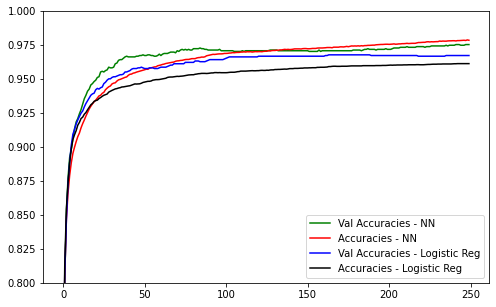

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

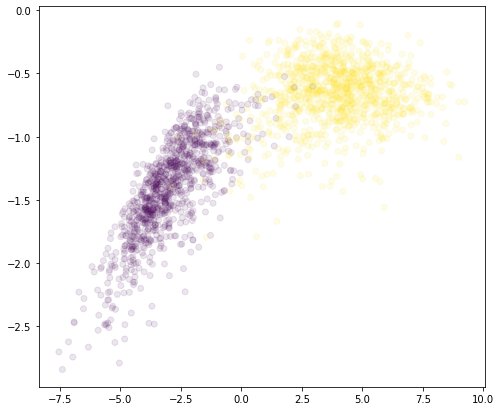

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

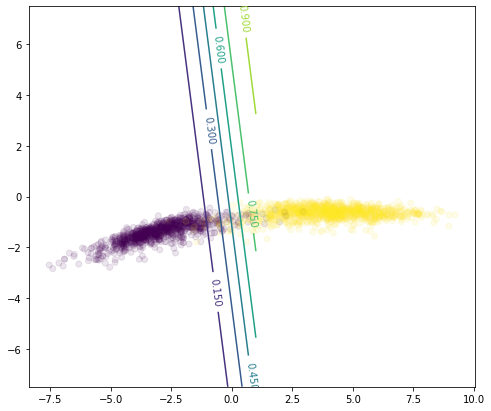

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );